<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn
In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [0]:
#Gary Machorro CS4990-Machine Learning
#Summer-2019
#6/10/19
#
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)


<h4>Use scikit-learn library in the following cell</h4>

Coefficients: 
 [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


Intercept: 
 [30.24675099]


Training set
--------------------------------------
RMSE is 4.652033184880168


Testing set
--------------------------------------
RMSE is 4.9286021826653466




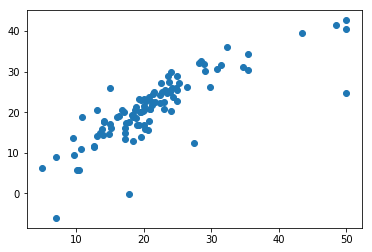

In [71]:

# Task 1-1: use linear regression in sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression() #initialize the linear regression
lin_model.fit(train_data,train_target) #fit the line using the given data

################################################################

# Task 1-2: show intercept and coefficents
print('Coefficients: \n', lin_model.coef_)#Print the coefficient as well as the intercept
print("\n")
print('Intercept: \n', lin_model.intercept_)

###############################################################

# Task 1-3: show errors on training dataset and testing dataset

# training set

target_train_predict = lin_model.predict(train_data)#from the model predict the price
rmse = (np.sqrt(mean_squared_error(train_target, target_train_predict)))#find error

print("\n")
print("Training set error")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# testing set

target_test_predict = lin_model.predict(test_data)#prediction for the test target
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(test_target, target_test_predict)))#find error


print("Testing set error")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")


####################################################################
# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset

plt.scatter(test_target,target_test_predict)#plot the figures
plt.show()


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

Intercept: 
 [22.79653465]


Coefficients:
 [[22.79653465]
 [-1.00213533]
 [ 0.69626862]
 [ 0.27806485]
 [ 0.7187384 ]
 [-2.0223194 ]
 [ 3.14523956]
 [-0.17604788]
 [-3.0819076 ]
 [ 2.25140666]
 [-1.76701378]
 [-2.03775151]
 [ 1.12956831]
 [-3.61165842]]


Training set error
--------------------------------------
RMSE is 16.473628065591896


Testing set error
--------------------------------------
RMSE is 16.519747037497286




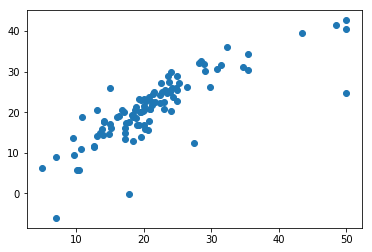

In [82]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
from matplotlib import pyplot
from numpy.linalg import inv

X=np.array(train_data)
y=np.array(train_target)

#plt.scatter(X,y)

def myNormalEqualFun(X,y):
    X_transpose = X.T  #basically doing the math operation for the normal equation to obtain weights
    weights = inv(X_transpose.dot(X)).dot(X_transpose).dot(y)  
    return weights
      
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions

def myPredictFun(X,weights):
  
  test_X_b = np.c_[np.ones((102, 1)), test_data]#use test data to create a prediction using arrays
  prediction = test_X_b.dot(weights)#dot probduct using the weights to create the prediciton
  
  return prediction

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)


# Task 2-3: show intercept and coefficents
print("Intercept: \n",w[0])
print("\n")
print("Coefficients:\n",w)

# Task 2-4: show errors on training dataset and testing dataset

#train set
target_train_predict = lin_model.predict(train_data)#from the model predict the price
rmse = (np.sqrt(mean_squared_error(train_target, target_train_predict)))#find error
print("\n")
print("Training set error")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# testing set

target_test_predict = lin_model.predict(test_data)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(test_target, target_test_predict)))#same as above


print("Testing set error")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")



# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset

target_test_predict = myPredictFun(np.array(test_data),w)
plt.scatter(test_target,target_test_predict)#plot the predictions from the test
plt.show()

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Intercept: 
 [0.49915187]


Coefficients:
 [[0.49915187]
 [0.73075068]
 [0.91812497]
 [0.91028333]
 [0.80701252]
 [0.93785195]
 [0.66469275]
 [0.1025797 ]
 [0.88506727]
 [0.40141563]
 [0.94687573]
 [0.21565097]
 [0.60660462]
 [0.56857143]]


Training set error
--------------------------------------
RMSE is 16.473628065591896


Testing set error
--------------------------------------
RMSE is 16.519747037497286




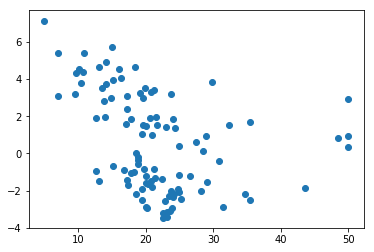

In [83]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights

alpha = 0.01 #Step size
iterations = 10 #No. of iterations
m=len(train_target)#length of the array of the target
w = np.random.rand(14,1)#shape of the array w

def myGradientDescentFun(X,y,learning_rate,numItrs,w):
  
    past_costs = []
    past_w = [w]
    for i in range(numItrs):#loop
        prediction = np.dot(X, w)#prediction by dot product of random weight and X
        error = prediction - y#finding error
        cost = 1/(2*m) * np.dot(error.T, error)#finding the cost and creating an array for it
        past_costs.append(cost)
        w = w - (learning_rate * (1/m) * np.dot(X.T, error))#recreating the equation in the slides
        past_w.append(w)
        
    return w

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  test_X_b = np.c_[np.ones((102, 1)), test_data] #use test data to create a prediction using arrays
  prediction = test_X_b.dot(w)#dot probduct using the weights to create the prediciton
  
  return prediction
  

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
weights = myGradientDescentFun(train_data_intercept,train_target,0.01,iterations,w)


# Task 3-3: show intercept and coefficents
print("Intercept: \n",w[0])
print("\n")
print("Coefficients:\n",w)

# Task 3-4: show errors on training dataset and testing dataset


#training set stats
target_train_predict = lin_model.predict(train_data)#from the model predict the price
rmse = (np.sqrt(mean_squared_error(train_target, target_train_predict)))#find error
print("\n")
print("Training set error")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# testing set

target_test_predict = lin_model.predict(test_data)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(test_target, target_test_predict)))


print("Testing set error")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
target_test_predict = myPredictFun(np.array(test_data),w)

plt.scatter(test_target,target_test_predict)#plot the predictions from the test

plt.show()